In [7]:
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt

# Load data

In [19]:
df = pd.DataFrame(columns=["text", "project_name"])

In [41]:
def load_data(directory):
    dfs = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            f = open(directory + filename, "r", encoding='utf-8')
            Lines = f.readlines()
            f.close()
            temp = pd.DataFrame()
            temp["text"] = Lines
            temp["project_name"] = filename
            temp = temp.drop(temp[temp["text"] == "\n"].index).reset_index(drop=True)
            dfs.append(temp)
    
    data = pd.DataFrame(columns=["text", "project_name"])

    for p in dfs:
        data = pd.concat([data, p], axis=0)
    data = data.reset_index(inplace=False)[["text", "project_name"]]
    data['text'] = data[data.text.str.endswith("\n")]['text'].str[:-2]
    data = clean_set_indicator(data)
    data['text'] = data['text'].str.lower()
    return data


def clean_set_indicator(data):
    for s in ["train", "validation", "test"]:
        data.project_name = data.project_name.str.replace(f"_{s}","")
    return data

In [42]:
data = load_data("github_data/train_set/")

## TFIDF

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape


from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# manual features

project_name
PaddleHub.txt            12035
PySolFC.txt              17145
building_tool.txt         2440
espnet.txt                9968
horovod.txt               7147
jina.txt                  3135
pytorch_geometric.txt     4316
Name: text, dtype: int64

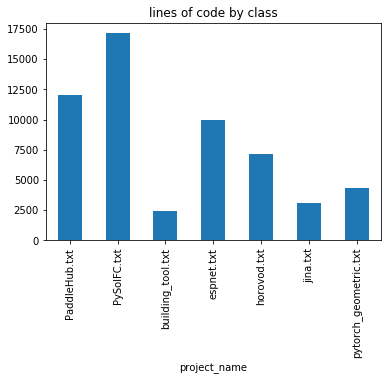

In [113]:
data.groupby("project_name").nunique()['text'].plot(kind='bar')
plt.title("lines of code by class")

data.groupby("project_name").nunique()['text']

# Features

In [156]:
class_df = data.copy()
class_df['text'] = class_df['text'].str.extract(r'class ([A-Za-z]*)[ :\(]')
class_df = class_df.dropna()

In [157]:
class_df = class_df[class_df.text.apply(lambda x: len(x) > 2)].drop_duplicates()

In [158]:
class_df.groupby('project_name').nunique()

,text,project_name
project_name,,
PaddleHub.txt,58,1
PySolFC.txt,173,1
building_tool.txt,11,1
espnet.txt,70,1
horovod.txt,87,1
jina.txt,38,1
pytorch_geometric.txt,57,1


Text(0.5, 1.0, "#'class' defined in each project")

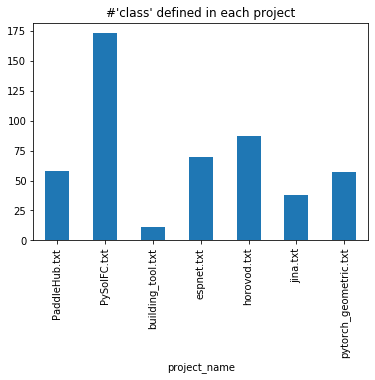

In [159]:
class_df.groupby('project_name').nunique()['text'].plot(kind='bar')

plt.title("#'class' defined in each project")

Text(0.5, 1.0, 'projects per classes defined')

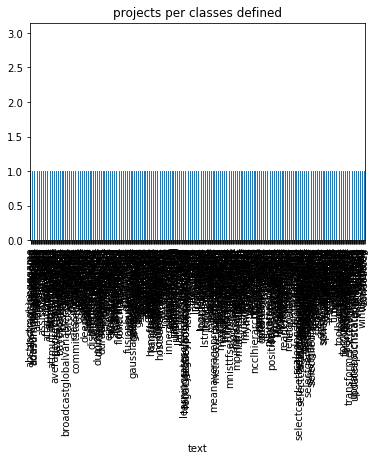

In [160]:
class_df.groupby('text')['project_name'].nunique().plot(kind='bar')
plt.title("projects per classes defined")

In [163]:
class_df.groupby('text')[['project_name']].nunique().reset_index()

,text,project_name
0,abstractmahjongggame,1
1,abstractshisengame,1
2,according,1
3,adasum,1
4,adasumgpuallreduceop,1
...,...,...
485,window,1
486,windowproperty,1
487,wisteria,1
488,wizarddialog,1


In [164]:
class_df

,text,project_name
99,autoindex,building_tool.txt
102,facemap,building_tool.txt
1482,sizeoffsetproperty,building_tool.txt
1531,archproperty,building_tool.txt
1608,trackedproperty,building_tool.txt
...,...,...
102037,fpmodule,pytorch_geometric.txt
102307,classification,pytorch_geometric.txt
102877,myfilter,pytorch_geometric.txt
102892,gnn,pytorch_geometric.txt


## project name

In [ ]:
#is the name of the project embedded in text
data[data["text"].str.contains("Jina")]

## camel case and style features

In [ ]:
# length of variable names, use of unique features (lambda, arrows and stuff), flags, type of filkes being use
# letgh of row of code (from start to end), number of inline notes (#)